# CA 1 - Project: Machine Learning for Business

To start this project, I will gather at the beginning all the libraries used to manipulate data, create visualizations, and develop and deploy machine learning models (ML).

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Preparation

## Exploratory Data Analysis (EDA):

### Importing dataset and knowing data structure

The method 'pd.read_csv' was used to access the CSV file containing the dataset. Then, I used the method '.head()' to visualize the data, followed by the method '.shape' to determine the dataset size. I found that this dataset has 8370 rows and 13 columns.

In [2]:
df = pd.read_csv("CourseraDataset-Clean.csv")
df.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


In [3]:
df.shape

(8370, 13)

The property '.dtypes' returns a Series with the data type of each column. Thus, we have ten object columns, two floats and one integer.   

In [4]:
df.dtypes

Course Title                       object
Rating                            float64
Level                              object
Schedule                           object
What you will learn                object
Skill gain                         object
Modules                            object
Instructor                         object
Offered By                         object
Keyword                            object
Course Url                         object
Duration to complete (Approx.)    float64
Number of Review                    int64
dtype: object

The '.describe()' tool generates descriptive statistics from the dataset. Comparing the mean and median values (50% value) revealed a skewed distribution in all columns. Thus, rescaling the data before applying the clustering models will be necessary because there is a considerable variation between features that can contribute to inaccurate predictions (Müller and Guido, 2017, p.138).

In [5]:
df.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


### Cleaning data

#### Checking for missing values

Although the source I got the dataset from reports that it is clean, I will certify this by looking for missing values and duplicates and doing imputation if necessary.

I used the '.info()' and '.isnull().sum()' to verify the presence of missing values (null and NaN). It returned that there are 33 points in the Modules feature and 88 in the Instructor feature. Considering that this amount will be insignificant for the entire dataset, I will remove these points, as they correspond to only 1.45% of the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   What you will learn             8370 non-null   object 
 5   Skill gain                      8370 non-null   object 
 6   Modules                         8337 non-null   object 
 7   Instructor                      8282 non-null   object 
 8   Offered By                      8370 non-null   object 
 9   Keyword                         8370 non-null   object 
 10  Course Url                      8370 non-null   object 
 11  Duration to complete (Approx.)  8370 non-null   float64
 12  Number of Review                83

In [7]:
df.isnull().sum()

Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64

I will use the function '.dropna(axis=0)' to remove the rows with missing values and the new daframe will be named 'df1'.

In [8]:
df1 = df.dropna(axis=0)

In [9]:
df1.shape

(8249, 13)

In [10]:
df1.isnull().sum()

Course Title                      0
Rating                            0
Level                             0
Schedule                          0
What you will learn               0
Skill gain                        0
Modules                           0
Instructor                        0
Offered By                        0
Keyword                           0
Course Url                        0
Duration to complete (Approx.)    0
Number of Review                  0
dtype: int64

Then, I checked for duplicates using the '.duplicated().sum()' tool, and there were no duplicates in this dataset.

In [11]:
df1.duplicated().sum()

0

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8249 non-null   object 
 1   Rating                          8249 non-null   float64
 2   Level                           8249 non-null   object 
 3   Schedule                        8249 non-null   object 
 4   What you will learn             8249 non-null   object 
 5   Skill gain                      8249 non-null   object 
 6   Modules                         8249 non-null   object 
 7   Instructor                      8249 non-null   object 
 8   Offered By                      8249 non-null   object 
 9   Keyword                         8249 non-null   object 
 10  Course Url                      8249 non-null   object 
 11  Duration to complete (Approx.)  8249 non-null   float64
 12  Number of Review                82

#### Checking for outliers

Based on my previous observations, this dataset appears skewed, suggesting the presence of potential outliers. To assess this, I will calculate the Interquartile Range (IQR) using the first and third quartile values. Subsequently, I will employ a boxplot graphic to visualize certain features. Finally, I will identify and, if necessary, remove any outliers that do not compromise the integrity of the dataset.

In [13]:
Q1 = df1.quantile(0.25, numeric_only=True)
Q3 = df1.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

In [14]:
df2 = df1[~((df1<(Q1-1.5*IQR))|(df1>Q3+1.5*IQR)).any(axis=1)]
df2.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_30596\1587481724.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1<(Q1-1.5*IQR))|(df1>Q3+1.5*IQR)).any(axis=1)]


(5259, 13)

In [15]:
df3 = df1[~((df1<(Q1-2*IQR))|(df1>Q3+2*IQR)).any(axis=1)]
df3.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_30596\713608911.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df1[~((df1<(Q1-2*IQR))|(df1>Q3+2*IQR)).any(axis=1)]


(5465, 13)

In [16]:
df4 = df1[~((df1<(Q1-3*IQR))|(df1>Q3+3*IQR)).any(axis=1)]
df4.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_30596\3183353013.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df4 = df1[~((df1<(Q1-3*IQR))|(df1>Q3+3*IQR)).any(axis=1)]


(6092, 13)

 #### Boxplot graphic to visualize outliers

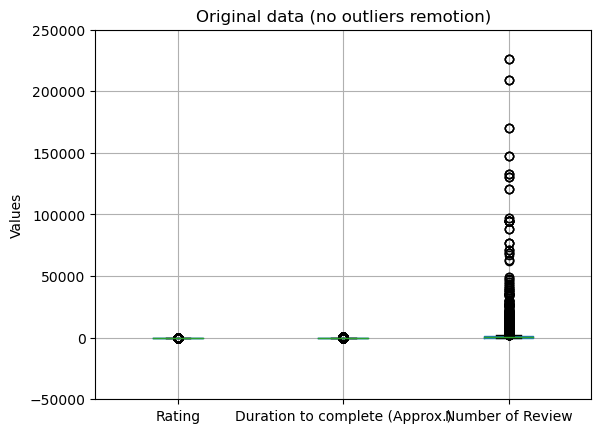

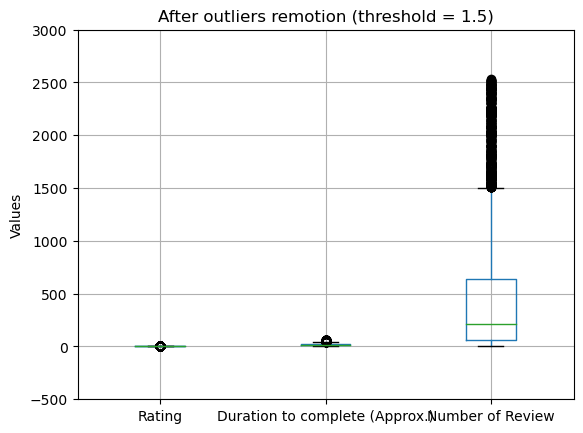

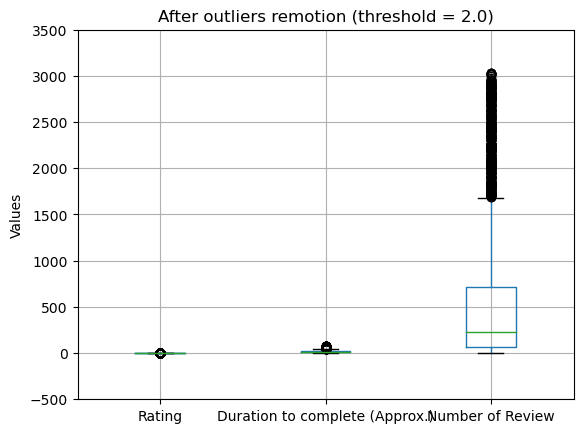

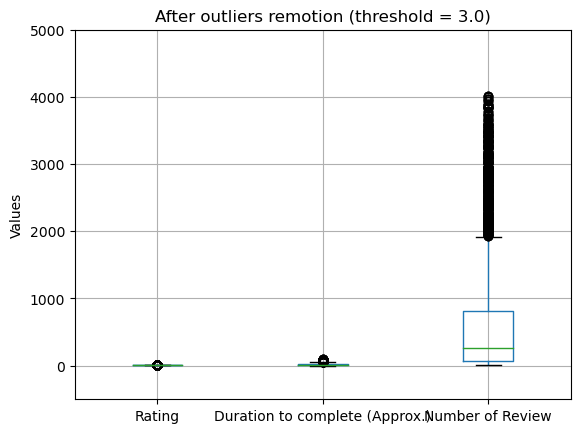

In [17]:
df1.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-50000, top=250000)
plt.title('Original data (no outliers remotion)')
plt.ylabel('Values')
plt.show()

df2.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-500, top=3000)
plt.title('After outliers remotion (threshold = 1.5)')
plt.ylabel('Values')
plt.show()

df3.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-500, top=3500)
plt.title('After outliers remotion (threshold = 2.0)')
plt.ylabel('Values')
plt.show()

df4.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-500, top=5000)
plt.title('After outliers remotion (threshold = 3.0)')
plt.ylabel('Values')
plt.show()

After applying three different thresholds (1.5, 2.0, and 3.0), I obtained the minimum amount of data removal, which would be 26.15% of the data. This is a considerable amount that might compromise the integrity of the data. Furthermore, the variables 'Rating' and 'Duration to complete (Approx.)' did not present outliers. This occurrence only affected the variable 'Number of Reviews,' which I need to be careful with when working with it. Therefore, I will not remove outliers.

## Data Preprocessing

Data preprocessing is crucial to the success of both supervised and unsupervised learning because this step can facilitate data computation more efficiently (Müller and Guido, 2017, p.138, 208).

Before choosing which method to use for scaling the data, I will check the data's sparsity because it provides information about the more suitable scaling method.

### Sparsity of the data
Sparse datasets are characterized by most features having 0 most of the time (Müller and Guido, 2017, p.44) and the sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. 

In [18]:
missing_values = df1.isnull().sum().sum()
zero_values = (df1 == 0).sum().sum()

total_data_points = df1.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.021


The sparsity values must be between 0 and 1 when 0 indicates no sparsity, and 1 indicates completely spaced. The result for this dataset was found to be 0.021, meaning that the dataset sparcity is relatively low. Thus, this data does not have a significant portion of missing or zero values.

Therefore, considering that the data is not sparse but skewed, using the MinMax Scaler is more suitable in this case. This practice is indicated for many algorithms sensitive to data scaling (Müller and Guido, 2017, p.132).

### Data Scaling

The use of data scaler is a common preprocessing for many ML models, and considering the results obtained above that the data is skewed and not sparse the Min-Max Scaling is the more suitable in this situation.

To start, I will specify the numerical columns that I will scale and then use the sklearn.preprocessing package to acesse the MinMaxScaler to transform the data.

In [23]:
columns_to_scale = ['Rating', 'Duration to complete (Approx.)', 'Number of Review']
df_subset = df1[columns_to_scale]

In [24]:
df_subset.head()

,Rating,Duration to complete (Approx.),Number of Review
0,4.8,20.0,2813
1,4.4,34.0,100
2,4.5,9.0,227
3,0.0,8.0,0
4,4.8,11.0,582


In [25]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_subset)
print(df_scaled)

[[9.60000000e-01 3.96659708e-02 1.24562724e-02]
 [8.80000000e-01 6.88935282e-02 4.42810964e-04]
 [9.00000000e-01 1.67014614e-02 1.00518089e-03]
 ...
 [0.00000000e+00 1.67014614e-02 0.00000000e+00]
 [0.00000000e+00 3.75782881e-02 0.00000000e+00]
 [0.00000000e+00 2.08768267e-03 0.00000000e+00]]


# ML models

# References

Müller, A. C. and Guido, S. (2017). Introduction to machine learning with Python: a guide for data scientists. 1st ed. United States of America. O’reilly Media.

**Delete** Jaiswal, S. (2024). *What is Normalization in Machine Learning? A Comprehensive Guide to Data Rescaling*. [online] DataCamp. Available at: https://www.datacamp.com/tutorial/normalization-in-machine-learning. [Accessed 20 Mar. 2024].